# Imports
---

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime

from sklearn.metrics import confusion_matrix, plot_confusion_matrix, classification_report
from nltk.sentiment.vader import SentimentIntensityAnalyzer

%matplotlib inline
pd.set_option('display.max_columns', None)
import warnings
warnings.simplefilter("ignore")

import pickle

In [2]:
with open('../models/gs_cnb.pkl', 'rb') as m:
    model = pickle.load(m)

# 1 = showerthoughts
# 0 = intrusivethoughts

In [3]:
train_df = pd.read_csv('../data/train_preds.csv')

# Results Explorations
---

In [4]:
X = pd.Series("do you ever think about showers in the shower shower shower")
pred = model.predict(X)
print(pred)

[0]


In [5]:
train_df.shape

(5994, 3)

              precision    recall  f1-score   support

           0       0.98      0.98      0.98      3000
           1       0.98      0.98      0.98      2994

    accuracy                           0.98      5994
   macro avg       0.98      0.98      0.98      5994
weighted avg       0.98      0.98      0.98      5994



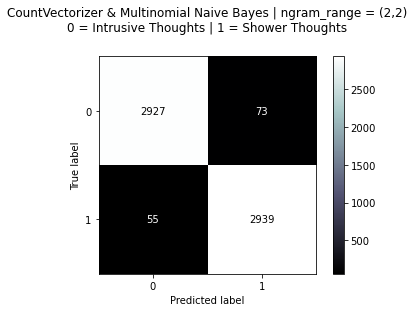

In [6]:
# Classification report
print(classification_report(train_df['is_st'], train_df['preds']))

# Confusion matrix
plot_confusion_matrix(model, train_df['title_self'], train_df['is_st'], cmap = 'bone')

plt.title('CountVectorizer & Multinomial Naive Bayes | ngram_range = (2,2)\n0 = Intrusive Thoughts | 1 = Shower Thoughts', pad = 25);

In [7]:
wrong_df = train_df[train_df['preds'] != train_df['is_st']]

In [8]:
wrong_df.reset_index(inplace = True, drop = True)

# Sentiment Analysis on Wrong Preds

In [9]:
sent = SentimentIntensityAnalyzer()
sent.polarity_scores(wrong_df['title_self'][3])['compound']

0.0

In [10]:
wrong_df['sent'] = [sent.polarity_scores(title)['compound'] for title in wrong_df['title_self']]

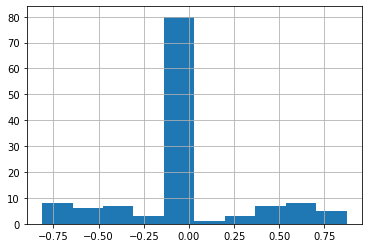

In [11]:
wrong_df['sent'].hist();

In [12]:
wrong_df[:50]

,title_self,is_st,preds,sent
0,star whores: cocks of the old republic,0,1,-0.6124
1,i gotta read war and peace before i die,0,1,-0.6486
2,shave ur head bald to be able to clean ur scal...,0,1,0.5994
3,what if you gave an elephant some lotion and t...,0,1,0.0000
4,take mushrooms and watch the passion of the ch...,0,1,0.4588
5,deglove your finger. it will free it. then do ...,0,1,0.8720
6,smack your forehead when that embarrassing tho...,0,1,-0.3818
7,the slow dancing part in movies is the best part.,0,1,0.6369
8,oh leave her johnny leave her,0,1,-0.1027
9,have you ever met your doppelganger irl?,0,1,0.0000


- Lots of neutral misclassifieds. Some other misclassifieds seem to be a little incoherent. Due to intrusive and shower thoughts sharing a lot of neutral territory in sentiment analysis and these misclassifications could make sense. 

# ... finish bigram analysis and create streamlit